#Vertebral Column Condition Classification 

This study has 2 main aims:
1.  To evaluate different machine learning models' performances in predicting vertebral column condition. 
2. Determine which biomechnical attributes have the most effect on patient's conditions based on the best performing model


A classification [dataset](http://archive.ics.uci.edu/ml/datasets/vertebral+column#) from the UCI library was used.  In the dataset, data points are classified in 2 different ways. The first classification distinguishes patient's condition as Normal or Abnormal.  Second classification details abnormal condition and distinguishes the class of patient as either Normal, Disk Hernia or Spondylolisthesis. 

Each data point contains information on six biomechanical attributes of a single patient; pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis.  



#Preprocessing


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os 
os.chdir("/content/gdrive/My Drive/Online_Lecture_Notes/vertebra_project/data")

Mounted at /content/gdrive


In [ ]:
import os 
os.chdir("/content/gdrive/My Drive/Online_Lecture_Notes/vertebra_project/data")

class2 = pd.read_csv("2class_data.csv")
class3 = pd.read_csv("3class_data.csv")
class3.head(3)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Hernia'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Hernia'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Hernia'


###Creating Matrix of Features and Dependent Variable Vectors

We'll just encode the 2 class data because the models we use don't require any encoding for the 3 class data 

We'll use LabelEncoder to encode Class column of 2 class dataset.

In [ ]:
x_2class = class2.iloc[:,:-1].values
y_2class = class2.iloc[:,-1].values

x_3class = class3.iloc[:,:-1].values
y_3class = class3.iloc[:,-1:].values

#Encoding 2 Class data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_2class=le.fit_transform(y_2class)

#Encoding 3 Class data
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories="auto")
y_3class_ohencoded = ohe.fit_transform(y_3class).toarray()

###Splitting Dataset into Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

x2c_train,x2c_test,y2c_train,y2c_test = train_test_split(x_2class,y_2class,test_size=0.2,random_state=1)
x3c_train,x3c_test,y3c_train,y3c_test = train_test_split(x_3class,y_3class,test_size=0.2,random_state=1)

###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_2class = StandardScaler()
x2c_train = sc_2class.fit_transform(x2c_train)
x2c_test = sc_2class.transform(x2c_test)

In [ ]:
sc_3class = StandardScaler()
x3c_train = sc_3class.fit_transform(x3c_train)
x3c_test = sc_3class.transform(x3c_test)

#Model Building 

Due to the fact that we don't have any information on whether the dataset is linear or nonlinear we'll build 6 different models using different methods and evaluate their performance at the end. 

Model Methods:


*   Logistic Regression 
*   K-Nearest Neighbors 
* Support Vector Machines 
* Naive Bayes 
* Decision Tree
* Random Forest 



##Logistic Regression 

For 2 class data we'll perform regular logistic regression however 3 class data requires multinomial logistic regression. 

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_2class = LogisticRegression()
classifier_3class= LogisticRegression(multi_class = "multinomial",penalty='none', solver='newton-cg',random_state=44)

#note that we didn't input OneHotEncoded version of dependent variable to 3 class multinomial regression model
classifier_2class.fit(x2c_train,y2c_train)
classifier_3class.fit(x3c_train,y3c_train)

logreg_pred_2class = classifier_2class.predict(x2c_test)
logreg_pred_3class = classifier_3class.predict(x3c_test)


from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
accuracy_2class= cross_val_score(classifier_2class,x2c_test,y2c_test,cv=10 )
accuracy_3class=cross_val_score(classifier_3class,x3c_test,y3c_test,cv=10)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
print( "2 Class Model Accuracy: %0.3f (+/- %0.3f)" %(accuracy_2class.mean(),accuracy_2class.std()),
      "\n", "3 Class Model Accuracy: %0.3f (+/-%0.3f)" %(accuracy_3class.mean(),accuracy_3class.std()))

2 Class Model Accuracy: 0.790 (+/- 0.104) 
 3 Class Model Accuracy: 0.745 (+/-0.191)


Both models have below 75% accuracy with significant standard deviation, let's also see how they perform in individual predictions. 

We'll predict values close to the first index of the dataset. 

In [ ]:
class3.head(2)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Hernia'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Hernia'


In [ ]:
#we expect the model to predict abnormal (0) and Hernia 

print(classifier_2class.predict(sc_2class.transform([[63.2,22,40,40,98,-0.25]])),classifier_3class.predict(sc_3class.transform([[63.2,22,40,40,98,-0.25]])))

[0] ["b'Hernia'"]


##K-Nearest Neighbors 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn_classifier_2class = KNeighborsClassifier(n_neighbors=18)
knn_classifier_3class = KNeighborsClassifier(n_neighbors=18)

knn_classifier_2class.fit(x2c_train,y2c_train)
knn_classifier_3class.fit(x3c_train,y3c_train)

from sklearn.model_selection import cross_val_score 
knn_accuracy_2class= cross_val_score(knn_classifier_2class,x2c_test,y2c_test,cv=10 )
knn_accuracy_3class=cross_val_score(knn_classifier_3class,x3c_test,y3c_test,cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [ ]:
print( "2 Class Model Accuracy: %0.2f (+/- %0.2f)" %(knn_accuracy_2class.mean(),knn_accuracy_2class.std()),
      "\n", "3 Class Model Accuracy: %0.2f (+/-%0.2f)" %(knn_accuracy_3class.mean(),knn_accuracy_3class.std()))

2 Class Model Accuracy: 0.71 (+/- 0.19) 
 3 Class Model Accuracy: 0.63 (+/-0.14)


KNN had a worse fitting model compared to Logistic Regression, let's have a look at an individual case. 

In [ ]:
print(knn_classifier_2class.predict(sc_2class.transform([[63.2,22,40,40,98,-0.25]])),
      knn_classifier_3class.predict(sc_3class.transform([[63.2,22,40,40,98,-0.25]])))


[0] ["b'Hernia'"]


##Support Vector Machine 

In [ ]:
from sklearn.svm import SVC
svm_2c_linear =SVC( kernel="linear")
svm_2c_nonlin = SVC(kernel="rbf")

svm_3c_lin = SVC (kernel="linear")
svm_3c_nonlin = SVC(kernel="rbf")

svm_2c_linear.fit(x2c_train,y2c_train)
svm_2c_nonlin.fit(x2c_train,y2c_train)
svm_3c_lin.fit(x3c_train,y3c_train)
svm_3c_nonlin.fit(x3c_train,y3c_train)

from sklearn.model_selection import cross_val_score
lin_2c = cross_val_score(svm_2c_linear,x2c_test,y2c_test,cv=10)
nonlin_2c = cross_val_score(svm_2c_nonlin,x2c_test,y2c_test,cv=10)
lin_3c = cross_val_score(svm_3c_lin,x3c_test,y3c_test,cv=10)
nonlin_3c = cross_val_score(svm_3c_nonlin,x3c_test,y3c_test,cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
print( "2 class linear kernel accuracy: %0.2f (+/- %0.2f)"%(lin_2c.mean(),lin_2c.std()),"\n",
      "2 class non-linear kernel accuracy: %0.2f (+/- %0.2f)"%(nonlin_2c.mean(),nonlin_2c.std()),"\n",
      "3 class linear kernel accuracy: %0.2f (+/- %0.2f)"%(lin_3c.mean(),lin_3c.std()),"\n",
      "3 class non-linear kernel accuracy: %0.2f (+/- %0.2f)"%(nonlin_3c.mean(),nonlin_3c.std()))

2 class linear kernel accuracy: 0.84 (+/- 0.08) 
 2 class non-linear kernel accuracy: 0.81 (+/- 0.16) 
 3 class linear kernel accuracy: 0.77 (+/- 0.13) 
 3 class non-linear kernel accuracy: 0.71 (+/- 0.14)


Linear SVM model produced the most accurate model so far. 

In [ ]:
print(svm_2c_linear.predict(sc_2class.transform([[63.2,22,40,40,98,-0.25]])),
      svm_3c_lin.predict(sc_3class.transform([[20,55,10,40,98,-0.25]])))

[0] ["b'Hernia'"]


##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier_2c= GaussianNB()
nb_classifier_3c = GaussianNB()
nb_classifier_2c.fit(x2c_train,y2c_train)
nb_classifier_3c.fit(x3c_train,y3c_train)

from sklearn.model_selection import cross_val_score
nb_2c_score = cross_val_score(nb_classifier_2c,x2c_test,y2c_test,cv=10)
nb_3c_score = cross_val_score(nb_classifier_3c,x3c_test,y3c_test,cv=10)

print("2 class data Naive Bayes accuracy : %.2f (+/- %.2f)"%(nb_2c_score.mean(),nb_2c_score.std()),
      "\n",
      " 3 class data Naive Bayes accuracy: %.2f (+/- %.2f)"%(nb_3c_score.mean(),nb_3c_score.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

2 class data Naive Bayes accuracy : 0.78 (+/- 0.18) 
  3 class data Naive Bayes accuracy: 0.78 (+/- 0.14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

##Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

dt_classifier_2c = DecisionTreeClassifier(criterion="entropy")
dt_classifier_3c = DecisionTreeClassifier(criterion="entropy")

dt_classifier_2c.fit(x2c_train,y2c_train)
dt_classifier_3c.fit(x3c_train,y3c_train)

from sklearn.model_selection import cross_val_score 
dt_2c_score = cross_val_score(dt_classifier_2c,x2c_test,y2c_test,cv=10)
dt_3c_score = cross_val_score(dt_classifier_3c,x3c_test,y3c_test,cv=10)

print(dt_2c_score.mean(),dt_3c_score.mean())

0.8714285714285713 0.8261904761904763


##Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier_2c = RandomForestClassifier(n_estimators = 50 , criterion= "entropy")
rf_classifier_3c = RandomForestClassifier(n_estimators = 10 , criterion= "entropy")

rf_classifier_2c.fit(x2c_train,y2c_train)
rf_classifier_3c.fit(x3c_train,y3c_train)

rf_2c_score = cross_val_score(rf_classifier_2c,x2c_test,y2c_test,cv=10)
rf_3c_score = cross_val_score(rf_classifier_3c,x3c_test,y3c_test,cv=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

In [ ]:
print(rf_2c_score.mean(),rf_3c_score.mean())

0.8595238095238095 0.8452380952380952


#Model Evaluation 

To evaluate the performance of our models we're going to use several metrics.  For 2-class models we'll use accuracy scores in cross validation, r-squared methods and the confusion matrix. 

For 3-class models, we'll be using accuracy scores and confusion matrix. 

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score 

#Logistic Regression
accuracy_2class= cross_val_score(classifier_2class,x2c_test,y2c_test,cv=10 )
accuracy_3class=cross_val_score(classifier_3class,x3c_test,y3c_test,cv=10)

logreg_2c_pred =classifier_2class.predict(x2c_test)
logreg_3c_pred =classifier_3class.predict(x3c_test)

logreg_r2_2c = r2_score(y2c_test,logreg_2c_pred)

#K-Nearest Neighbor 

knn_accuracy_2class= cross_val_score(knn_classifier_2class,x2c_test,y2c_test,cv=10 )
knn_accuracy_3class=cross_val_score(knn_classifier_3class,x3c_test,y3c_test,cv=10)

knn_2c_pred = knn_classifier_2class.predict(x2c_test)
knn_3c_pred = knn_classifier_3class.predict(x3c_test)

knn_r2_2c = r2_score(y2c_test,knn_2c_pred)

#Support Vector Machines 
linear_svm_2c = cross_val_score(svm_2c_linear,x2c_test,y2c_test,cv=10)
nonlin_svm_2c = cross_val_score(svm_2c_nonlin,x2c_test,y2c_test,cv=10)
linear_svm_3c = cross_val_score(svm_3c_lin,x3c_test,y3c_test,cv=10)
nonlin_svm_3c = cross_val_score(svm_3c_nonlin,x3c_test,y3c_test,cv=10)

lin_svm_2pred = svm_2c_linear.predict(x2c_test)
nonlin_svm_2pred = svm_2c_nonlin.predict(x2c_test)
lin_svm_3pred = svm_3c_lin.predict(x3c_test)
nonlin_svm_3pred = svm_3c_nonlin.predict(x3c_test)

linsvm_r2_2c = r2_score(y2c_test,lin_svm_2pred)
nonlinsvm_r2_2c = r2_score(y2c_test,nonlin_svm_2pred)

#Naive Bayes 
nb_2c_score = cross_val_score(nb_classifier_2c,x2c_test,y2c_test,cv=10)
nb_3c_score = cross_val_score(nb_classifier_3c,x3c_test,y3c_test,cv=10)

nb_2c_pred = nb_classifier_2c.predict(x2c_test)
nb_3c_pred = nb_classifier_3c.predict(x3c_test)

nb_r2_2c = r2_score(y2c_test,nb_2c_pred)

#Decision Tree 
dt_2c_score = cross_val_score(dt_classifier_2c,x2c_test,y2c_test,cv=10)
dt_3c_score = cross_val_score(dt_classifier_3c,x3c_test,y3c_test,cv=10)

dt_2c_pred = dt_classifier_2c.predict(x2c_test)
dt_3c_pred = dt_classifier_3c.predict(x3c_test)

dt_r2_2c = r2_score(y2c_test,dt_2c_pred)

#Random Forest 
rf_2c_score = cross_val_score(rf_classifier_2c,x2c_test,y2c_test,cv=10)
rf_3c_score = cross_val_score(rf_classifier_3c,x3c_test,y3c_test,cv=10)

rf_2c_pred = rf_classifier_2c.predict(x2c_test)
rf_3c_pred = rf_classifier_3c.predict(x3c_test)

rf_r2_2c = r2_score(y2c_test,rf_2c_pred)


###Accuracy Score Comparison for 2 Class Data

In [ ]:
dict = {"2 Class Model Name": ["Logistic Regression","K-Nearest Neighbor","Support Vector Machine (linear)","Support Vector Machine (non-linear)", "Naive Bayes","Decision Tree","Random Forest"],
        "Accuracy Score": [accuracy_2class.mean(),knn_accuracy_2class.mean(),linear_svm_2c.mean(),nonlin_svm_2c.mean(),nb_2c_score.mean(),dt_2c_score.mean(),rf_2c_score.mean()],
        "r2 Score": [logreg_r2_2c,knn_r2_2c,linsvm_r2_2c,nonlinsvm_r2_2c,nb_r2_2c,dt_r2_2c,rf_r2_2c]}

df1 = pd.DataFrame(dict)
df1 = df1.round(2)
df1

,2 Class Model Name,Accuracy Score,r2 Score
0,Logistic Regression,0.79,0.41
1,K-Nearest Neighbor,0.71,-0.03
2,Support Vector Machine (linear),0.84,0.34
3,Support Vector Machine (non-linear),0.81,0.26
4,Naive Bayes,0.78,0.19
5,Decision Tree,0.87,0.19
6,Random Forest,0.86,0.26


In [ ]:
df1.to_csv("2Class_ModelAccuracyScores.csv",index=False )

###Confusion Matrices for 2 Class Models

In [ ]:
#creating confusion matrices 
classnames = list(set(y2c_train))

logreg_conmat = confusion_matrix(y2c_test,logreg_2c_pred)
val1=np.mat(logreg_conmat)
logreg_df = pd.DataFrame(val1,index=classnames,columns=classnames)

knn_conmat = confusion_matrix(y2c_test,knn_2c_pred)
val2=np.mat(knn_conmat)
knn_df = pd.DataFrame(val2,index=classnames,columns=classnames)


linsvm_conmat = confusion_matrix(y2c_test,lin_svm_2pred)
val3=np.mat(linsvm_conmat)
linsvm_df = pd.DataFrame(val3,index=classnames,columns=classnames)

nonlin_svm_conmat = confusion_matrix(y2c_test,nonlin_svm_2pred)
val4=np.mat(nonlin_svm_conmat)
nonlin_svm_df = pd.DataFrame(val4,index=classnames,columns=classnames)

nb_conmat = confusion_matrix(y2c_test,nb_2c_pred)
val5=np.mat(nb_conmat)
nb_df = pd.DataFrame(val5,index=classnames,columns=classnames)

dt_conmat = confusion_matrix(y2c_test,dt_2c_pred)
val6=np.mat(dt_conmat)
dt_df = pd.DataFrame(val6,index=classnames,columns=classnames)

rf_conmat = confusion_matrix(y2c_test,rf_2c_pred)
val7=np.mat(rf_conmat)
rf_df = pd.DataFrame(val7,index=classnames,columns=classnames)

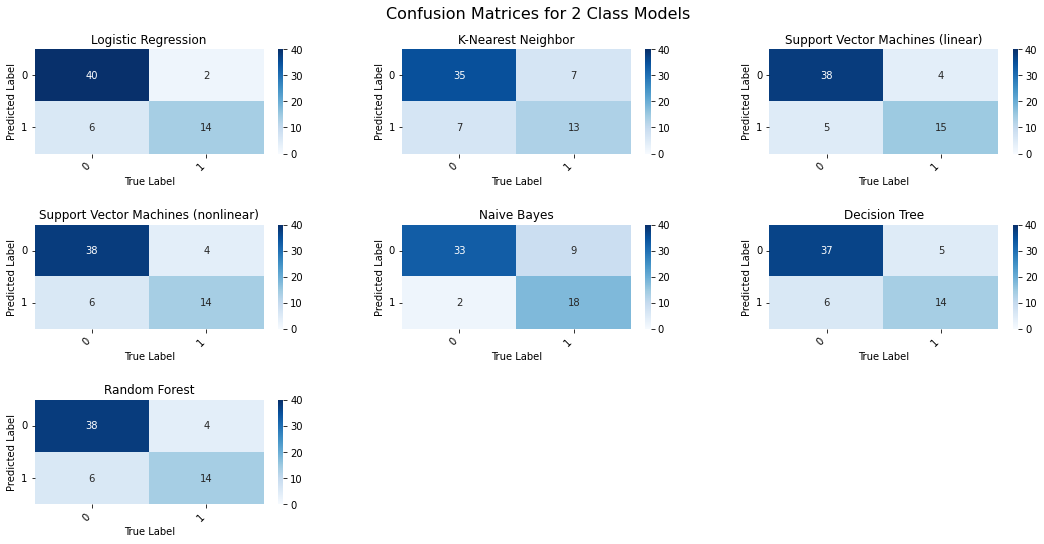

In [ ]:
#creating confusion matrix graphs 
fig,axes = plt.subplots(3,3,figsize=(16,8))
plt.tight_layout(pad=5)
fig.suptitle("Confusion Matrices for 2 Class Models",fontsize=16)

axes[0,0].set_title("Logistic Regression")
heatmap = sns.heatmap(logreg_df,annot=True,vmin=0,vmax=40, cmap="Blues", ax = axes[0,0]);
axes[0,0].set_xlabel("True Label")
axes[0,0].set_ylabel("Predicted Label")
axes[0,0].yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
axes[0,0].xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

axes[0,1].set_title("K-Nearest Neighbor")
heatmap = sns.heatmap(knn_df,annot=True, vmin=0,vmax=40,cmap="Blues", ax = axes[0,1])
axes[0,1].set_xlabel("True Label")
axes[0,1].set_ylabel("Predicted Label")
axes[0,1].yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
axes[0,1].xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

axes[0,2].set_title("Support Vector Machines (linear)")
heatmap = sns.heatmap(linsvm_df,annot=True, vmin=0,vmax=40, cmap="Blues", ax = axes[0,2])
axes[0,2].set_xlabel("True Label")
axes[0,2].set_ylabel("Predicted Label")
axes[0,2].yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
axes[0,2].xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

axes[1,0].set_title("Support Vector Machines (nonlinear)")
heatmap = sns.heatmap(nonlin_svm_df,annot=True,vmin=0,vmax=40, cmap="Blues", ax = axes[1,0])
axes[1,0].set_xlabel("True Label")
axes[1,0].set_ylabel("Predicted Label")
axes[1,0].yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
axes[1,0].xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

axes[1,1].set_title("Naive Bayes")
heatmap = sns.heatmap(nb_df,annot=True,vmin=0,vmax=40, cmap="Blues", ax = axes[1,1])
axes[1,1].set_xlabel("True Label")
axes[1,1].set_ylabel("Predicted Label")
axes[1,1].yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
axes[1,1].xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')


axes[1,2].set_title("Decision Tree")
heatmap = sns.heatmap(dt_df,annot=True,vmin=0,vmax=40, cmap="Blues", ax = axes[1,2])
axes[1,2].set_xlabel("True Label")
axes[1,2].set_ylabel("Predicted Label")
axes[1,2].yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
axes[1,2].xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')


axes[2,0].set_title("Random Forest")
heatmap = sns.heatmap(rf_df,annot=True, vmin=0,vmax=40,cmap="Blues", ax = axes[2,0])
axes[2,0].set_xlabel("True Label")
axes[2,0].set_ylabel("Predicted Label")
axes[2,0].yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
axes[2,0].xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])

plt.savefig("2Class Test Set Confusion Matrices ", dpi=300) 

Confusion matrix visualization for 2 class & 3 class (https://builtin.com/data-science/evaluating-classification-models) 

Accuracy score table for 3 class

After model evaluation, select best performing model and evaluate which attributes are most significant for development of vertebra problems 

###Accuracy Score for 3 Class Data

In [ ]:
dict = {"3 Class Model Name": ["Logistic Regression","K-Nearest Neighbor","Support Vector Machine (linear)","Support Vector Machine (non-linear)", "Naive Bayes","Decision Tree","Random Forest"],
        "Accuracy Score": [accuracy_3class.mean(),knn_accuracy_3class.mean(),linear_svm_3c.mean(),nonlin_svm_3c.mean(),nb_3c_score.mean(),dt_3c_score.mean(),rf_3c_score.mean()]}

df2 = pd.DataFrame(dict)
df2 = df2.round(2)
df2

,3 Class Model Name,Accuracy Score
0,Logistic Regression,0.75
1,K-Nearest Neighbor,0.63
2,Support Vector Machine (linear),0.77
3,Support Vector Machine (non-linear),0.71
4,Naive Bayes,0.78
5,Decision Tree,0.88
6,Random Forest,0.79


In [ ]:
df2.to_csv("3Class_ModelAccuracyScores.csv",index=False )

###Confusion Matrices for 3 Class Data

In [ ]:
classnames = list(set(logreg_3c_pred))

logreg_conmat3 = confusion_matrix(y3c_test,logreg_3c_pred)
val10=np.mat(logreg_conmat3)
logreg_df3 = pd.DataFrame(val10,index=classnames,columns=classnames)

knn_conmat3 = confusion_matrix(y3c_test,knn_3c_pred)
val20=np.mat(knn_conmat3)
knn_df3 = pd.DataFrame(val20,index=classnames,columns=classnames)


linsvm_conmat3 = confusion_matrix(y3c_test,lin_svm_3pred)
val30=np.mat(linsvm_conmat3)
linsvm_df3 = pd.DataFrame(val30,index=classnames,columns=classnames)

nonlin_svm_conmat3 = confusion_matrix(y3c_test,nonlin_svm_3pred)
val40=np.mat(nonlin_svm_conmat3)
nonlin_svm_df3 = pd.DataFrame(val40,index=classnames,columns=classnames)

nb_conmat3 = confusion_matrix(y3c_test,nb_3c_pred)
val50=np.mat(nb_conmat3)
nb_df3 = pd.DataFrame(val50,index=classnames,columns=classnames)

dt_conmat3 = confusion_matrix(y3c_test,dt_3c_pred)
val60=np.mat(dt_conmat3)
dt_df3 = pd.DataFrame(val60,index=classnames,columns=classnames)

rf_conmat3 = confusion_matrix(y3c_test,rf_3c_pred)
val70=np.mat(rf_conmat3)
rf_df3 = pd.DataFrame(val70,index=classnames,columns=classnames)

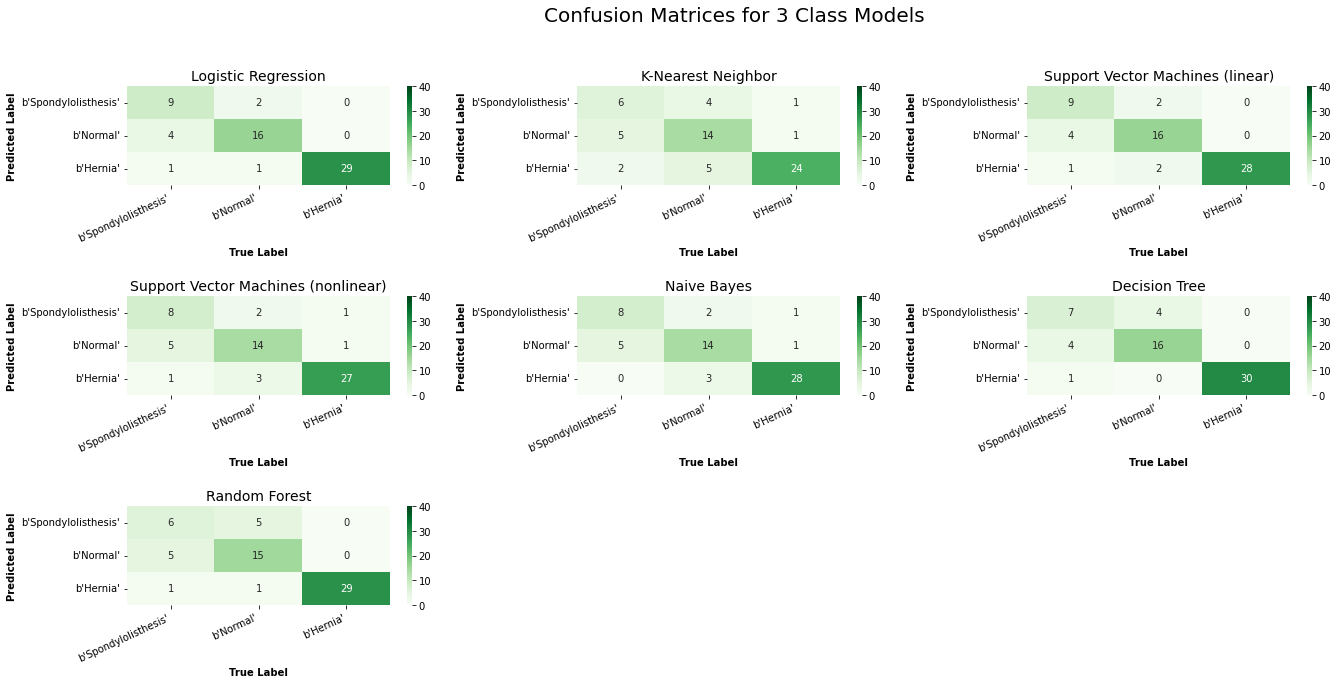

In [ ]:
fig,axes = plt.subplots(3,3,figsize=(20,10));
plt.tight_layout(pad=9)
fig.suptitle("Confusion Matrices for 3 Class Models",fontsize=20);

axes[0,0].set_title("Logistic Regression",fontsize=14)
heatmap = sns.heatmap(logreg_df3,annot=True,vmin=0,vmax=40, cmap="Greens", ax = axes[0,0]);
axes[0,0].set_xlabel("True Label",fontweight="bold")
axes[0,0].set_ylabel("Predicted Label",fontweight="bold")
axes[0,0].yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
axes[0,0].xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=25, ha='right')

axes[0,1].set_title("K-Nearest Neighbor",fontsize=14)
heatmap = sns.heatmap(knn_df3,annot=True, vmin=0,vmax=40,cmap="Greens", ax = axes[0,1])
axes[0,1].set_xlabel("True Label",fontweight="bold")
axes[0,1].set_ylabel("Predicted Label",fontweight="bold")
axes[0,1].yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
axes[0,1].xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=25, ha='right')

axes[0,2].set_title("Support Vector Machines (linear)",fontsize=14)
heatmap = sns.heatmap(linsvm_df3,annot=True, vmin=0,vmax=40, cmap="Greens", ax = axes[0,2])
axes[0,2].set_xlabel("True Label",fontweight="bold")
axes[0,2].set_ylabel("Predicted Label",fontweight="bold")
axes[0,2].yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
axes[0,2].xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=25, ha='right')

axes[1,0].set_title("Support Vector Machines (nonlinear)",fontsize=14)
heatmap = sns.heatmap(nonlin_svm_df3,annot=True,vmin=0,vmax=40, cmap="Greens", ax = axes[1,0])
axes[1,0].set_xlabel("True Label",fontweight="bold")
axes[1,0].set_ylabel("Predicted Label",fontweight="bold")
axes[1,0].yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
axes[1,0].xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=25, ha='right')

axes[1,1].set_title("Naive Bayes",fontsize=14)
heatmap = sns.heatmap(nb_df3,annot=True,vmin=0,vmax=40, cmap="Greens", ax = axes[1,1])
axes[1,1].set_xlabel("True Label",fontweight="bold")
axes[1,1].set_ylabel("Predicted Label",fontweight="bold")
axes[1,1].yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
axes[1,1].xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=25, ha='right')


axes[1,2].set_title("Decision Tree",fontsize=14)
heatmap = sns.heatmap(dt_df3,annot=True,vmin=0,vmax=40, cmap="Greens", ax = axes[1,2])
axes[1,2].set_xlabel("True Label",fontweight="bold")
axes[1,2].set_ylabel("Predicted Label",fontweight="bold")
axes[1,2].yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
axes[1,2].xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=25, ha='right')


axes[2,0].set_title("Random Forest",fontsize=14)
heatmap = sns.heatmap(rf_df3,annot=True, vmin=0,vmax=40,cmap="Greens", ax = axes[2,0])
axes[2,0].set_xlabel("True Label",fontweight="bold")
axes[2,0].set_ylabel("Predicted Label",fontweight="bold")
axes[2,0].yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
axes[2,0].xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=25, ha='right')

fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])

plt.savefig("3Class Test Set Confusion Matrices ", dpi=300) 

#Feature Importance Evaluation

When the accuracy scores are inspected, Decision Tree model seems to be the best performing model in both classes.  Confusion matrices of Decision Tree models confirm this statement. 

Due to it's high performance, Decision Tree model will be used to evaluate the effect of each biomechanical feature on the patient condition. 

In [ ]:
df1

,2 Class Model Name,Accuracy Score,r2 Score
0,Logistic Regression,0.79,0.41
1,K-Nearest Neighbor,0.71,-0.03
2,Support Vector Machine (linear),0.84,0.34
3,Support Vector Machine (non-linear),0.81,0.26
4,Naive Bayes,0.78,0.19
5,Decision Tree,0.87,0.19
6,Random Forest,0.86,0.26


In [ ]:
df2

,3 Class Model Name,Accuracy Score
0,Logistic Regression,0.75
1,K-Nearest Neighbor,0.63
2,Support Vector Machine (linear),0.77
3,Support Vector Machine (non-linear),0.71
4,Naive Bayes,0.78
5,Decision Tree,0.88
6,Random Forest,0.79


##Feature Importance Scores


We can calculate the importance of features in classification models using *classifier.feature_importances_* function

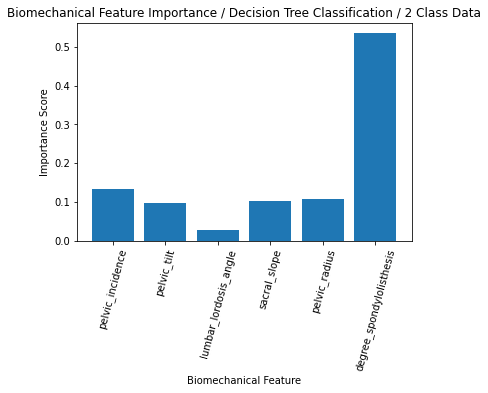

In [52]:
biomechanical_features = []
for i in class3.columns[:-1]:
	biomechanical_features.append(i)

importance_2class = dt_classifier_2c.feature_importances_

# plot feature importance
plt.bar(biomechanical_features, importance_2class)
plt.title("Biomechanical Feature Importance / Decision Tree Classification / 2 Class Data")
plt.ylabel("Importance Score")
plt.xlabel("Biomechanical Feature")
plt.xticks(rotation = 75)

plt.savefig("Feature Importance_2Class.png", bbox_inches = "tight",dpi=300) 

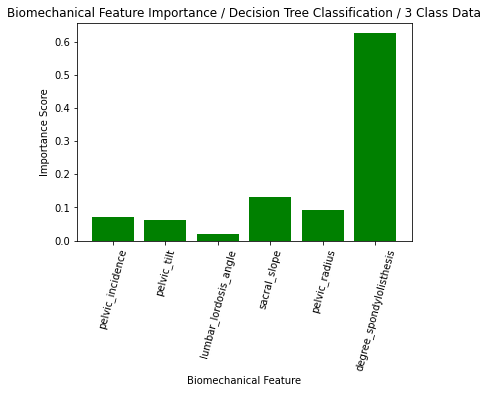

In [54]:
importance_3class = dt_classifier_3c.feature_importances_

plt.bar(biomechanical_features, importance_3class,color="green")
plt.title("Biomechanical Feature Importance / Decision Tree Classification / 3 Class Data")
plt.ylabel("Importance Score")
plt.xlabel("Biomechanical Feature")
plt.xticks(rotation = 75)
plt.savefig("Feature Importance_3Class.png",bbox_inches = "tight", dpi=300) 
plt.show()

#Discussion and Conclusion

In this study six different classification models were built to predict the vertebral column condition of a given patient based on biomechanical measurements.  Decision Tree Classification model showed the highest accuracy in predicting both Normal/Abnormal classification and Normal/Disc Hernia/Spondylolisthesis classification of the patient.  

Furthermore, the effect of each biomechanical feature was inspected.  According to our model degree of spondylolisthesis feature, which is the measurement of the slippage of vertebra over the body beneath it, is the most prominent factor in determining the vertebral column condition.  All the other measurements have very similar effect.  
